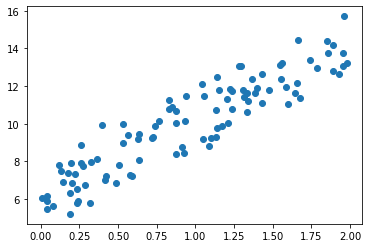

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

X = 2*np.random.rand(100,1)
y=6+4*X+np.random.randn(100,1)
plt.scatter(X,y)

In [2]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N = len(y)
    w1_update=np.zeros_like(w1)
    w0_update=np.zeros_like(w0)
    y_pred = np.dot(X,w1.T)+w0
    diff=y-y_pred
    w0_factors=np.ones((N,1))
    w1_update=-(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    return w1_update,w0_update



In [3]:
def gradient_descent_steps(X,y,iters=10000):
    w0 = np.zeros((1,1))
    w1=np.zeros((1,1))
    
    for ind in range(iters):
        w1_update,w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1 = w1-w1_update
        w0=w0-w0_update
    return w1,w0


In [4]:
def get_cost(y,y_pred):
    N=len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost


In [5]:
w1,w0 = gradient_descent_steps(X,y,iters=10000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0]*X+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:3.968 w0:6.222
Gradient Descent Total Cost:0.9924


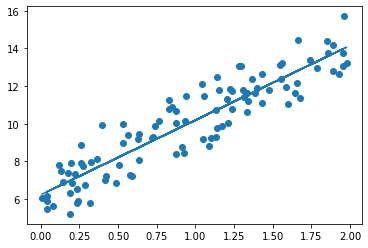

In [6]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [7]:
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index=np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        w1_update,w0_update = get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
        w1 = w1-w1_update
        w0=w0-w0_update
    return w1,w0

In [8]:
w1,w0 = stochastic_gradient_descent_steps(X,y,iters=1000)
print('w1:',round(w1[0,0],3),'w0:',round(w0[0,0],3))
y_pred = w1[0,0]*X+w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


In [9]:
# 다항회귀와 과대적합

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [10]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피쳐:\n',X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피쳐:\n',poly_ftr)

일차 단항식 계수 피쳐:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피쳐:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [11]:
def polynomial_func(X):
    y = 1+2*X+X**2+X**3
    return y



In [12]:
X = np.arange(4).reshape(2,2)
print('X')

y =polynomial_func(X)
print(y)

X
[[ 1  5]
 [17 43]]


In [13]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print(poly_ftr)

[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr,y)
print(np.round(model.coef_,2))
print(model.coef_.shape)

[[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
(2, 10)


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
def polynomial_func(X):
    y =1+2*X+X**2+X**3
    return y

model = Pipeline([('poly',PolynomialFeatures(degree=2)),('linear',LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

In [16]:
model = model.fit(X,y)

In [17]:
print(np.round(model.named_steps['linear'].coef_,2))

[[0.   0.26 0.26 0.52 0.77 1.03]
 [0.   0.61 0.61 1.23 1.84 2.45]]


In [18]:
def true_fun(X):
    return np.cos(1.5*np.pi*X)

In [19]:
np.random.seed(0)
n_samples =30
X =np.sort(np.random.rand(n_samples))


In [20]:
y = true_fun(X)+np.random.randn(n_samples)*0.1

1 [-2.] 2
1 0.40772896250986834
4 [  0. -18.  24.  -7.] 2
4 0.04320874987231747
15 [-2.98300000e+03  1.03900000e+05 -1.87417100e+06  2.03717220e+07
 -1.44873987e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 2
15 182815433.47648773


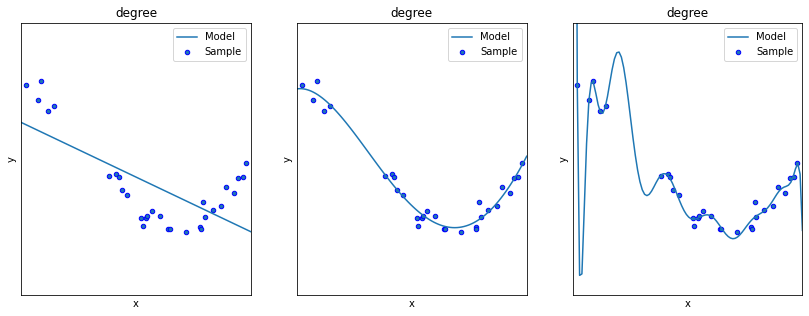

In [21]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees),i+1)
    plt.setp(ax,xticks=(),yticks=())
    polynomial_features = PolynomialFeatures(degree=degrees[i],include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features',polynomial_features),('linear_regression',linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)
    scores = cross_val_score(pipeline,X.reshape(-1,1),y,scoring ='neg_mean_squared_error',cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print(degrees[i],np.round(coefficients),2)
    print(degrees[i],-1*np.mean(scores))
    X_test = np.linspace(0,1,100)
    plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]),label = 'Model')
    plt.scatter(X,y,edgecolor='b',s=20,label='Sample')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc='best')
    plt.title('degree')
plt.show()